In [317]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import sys

In [318]:
df_data = pd.read_csv('./data/data.csv',
                             header=None)
df_data.head()

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432


In [319]:
def parse_col(col):
    try:
        return 'V%d' % (int(col) + 1)
    except:
        return col

parser = np.vectorize(parse_col)

In [320]:
cols = df_data.columns.values
parsed_cols = parser(cols)

In [321]:
df_data.columns = parsed_cols
df_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V581,V582,V583,V584,V585,V586,V587,V588,V589,V590
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432


In [322]:
df_important_vars = pd.read_csv('./data/var_importance.csv',
                    header=None)

important_vars = df_important_vars.as_matrix()
not_important = np.setdiff1d(parsed_cols, important_vars)

In [323]:
#df_data.drop(not_important, axis=1, inplace=True)
df_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V581,V582,V583,V584,V585,V586,V587,V588,V589,V590
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432


In [324]:
df_labels = pd.read_csv('./data/labels.csv',
                    header=None,
                    parse_dates=[1])

df_labels.columns = [ 'RESULTS', 'TIMESTAMP' ]
df_labels['INDEX'] = range(0, len(df_labels))
df_labels.head()

,RESULTS,TIMESTAMP,INDEX
0,-1,2008-07-19 11:55:00,0
1,-1,2008-07-19 12:32:00,1
2,1,2008-07-19 13:17:00,2
3,-1,2008-07-19 14:43:00,3
4,-1,2008-07-19 15:22:00,4


In [325]:
df_concat = pd.concat([df_data, df_labels], axis=1)
df_concat.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V584,V585,V586,V587,V588,V589,V590,RESULTS,TIMESTAMP,INDEX
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1,2008-07-19 11:55:00,0
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1,2008-07-19 12:32:00,1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1,2008-07-19 13:17:00,2
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1,2008-07-19 14:43:00,3
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1,2008-07-19 15:22:00,4


In [326]:
df_data['INDEX'] = range(0, len(df_data))

In [327]:
df_cor = df_concat.corr()
df_cor.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V583,V584,V585,V586,V587,V588,V589,V590,RESULTS,INDEX
V1,1.000000,-0.145071,0.004775,-0.007655,-0.011047,NaN,0.002281,0.031510,-0.052731,0.009052,...,0.000225,0.023469,0.019921,0.023605,0.018472,-0.025909,-0.028196,0.004177,-0.025144,0.093141
V2,-0.145071,1.000000,0.005802,-0.007603,-0.001641,NaN,-0.025702,-0.012084,0.031321,0.024015,...,0.043690,0.002905,-0.001264,0.002273,-0.009417,0.017290,0.010134,0.044834,-0.002615,-0.007699
V3,0.004775,0.005802,1.000000,0.298935,0.095891,NaN,-0.136225,-0.273970,0.023609,0.016291,...,-0.006061,0.015711,0.018237,0.015765,-0.025548,-0.029479,-0.030943,-0.033226,-0.000957,-0.009372
V4,-0.007655,-0.007603,0.298935,1.000000,-0.058483,NaN,-0.685835,0.138290,-0.103656,0.068998,...,0.009045,0.025461,0.024754,0.026043,0.034779,-0.039309,-0.033780,-0.081157,-0.024631,0.159197
V5,-0.011047,-0.001641,0.095891,-0.058483,1.000000,NaN,-0.074368,-0.916410,-0.026035,0.054619,...,0.045361,-0.001301,-0.001598,-0.001617,-0.044016,-0.031145,-0.026204,0.051428,-0.013760,0.069046


In [328]:
df_results = df_cor.drop( df_cor.index[ len(df_cor) -1 ] )

In [329]:
df_results = df_results[['RESULTS']]
df_results.head()

,RESULTS
V1,-0.025144
V2,-0.002615
V3,-0.000957
V4,-0.024631
V5,-0.013760


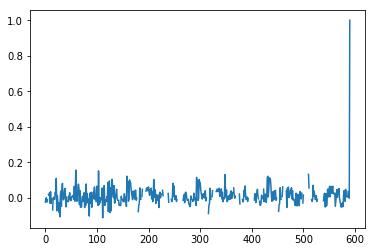

In [330]:
#plt.xticks( results.index.values ) # location, labels
plt.plot( df_results.as_matrix() )
plt.show()

In [331]:
np.min(df_labels[['TIMESTAMP']])

TIMESTAMP   2008-01-08 02:02:00
dtype: datetime64[ns]

In [332]:
np.max(df_labels[['TIMESTAMP']])

TIMESTAMP   2008-12-10 18:47:00
dtype: datetime64[ns]

In [333]:
len(df_labels[['RESULTS']] == 1)

1567

In [334]:
len(df_labels[['RESULTS']] == -1)

1567

In [335]:
df_join = df_labels.join(df_data, lsuffix='_caller', rsuffix='_other')
df_join['INDEX'] = df_join['INDEX_caller']
df_join = df_join.drop('INDEX_caller', 1)
df_join = df_join.drop('INDEX_other', 1)
df_join

,RESULTS,TIMESTAMP,V1,V2,V3,V4,V5,V6,V7,V8,...,V582,V583,V584,V585,V586,V587,V588,V589,V590,INDEX
0,-1,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,0
1,-1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,1
2,1,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,2
3,-1,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,3
4,-1,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,4
5,-1,2008-07-19 17:53:00,2946.25,2432.84,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,...,44.0077,0.4949,0.0189,0.0044,3.8276,0.0342,0.0151,0.0052,44.0077,5
6,-1,2008-07-19 19:44:00,3030.27,2430.12,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,...,NaN,0.5010,0.0143,0.0042,2.8515,0.0342,0.0151,0.0052,44.0077,6
7,-1,2008-07-19 19:45:00,3058.88,2690.15,2248.9000,1004.4692,0.7884,100.0,106.2400,0.1185,...,95.0310,0.4984,0.0106,0.0034,2.1261,0.0204,0.0194,0.0063,95.0310,7
8,-1,2008-07-19 20:24:00,2967.68,2600.47,2248.9000,1004.4692,0.7884,100.0,106.2400,0.1185,...,111.6525,0.4993,0.0172,0.0046,3.4456,0.0111,0.0124,0.0045,111.6525,8
9,-1,2008-07-19 21:35:00,3016.11,2428.37,2248.9000,1004.4692,0.7884,100.0,106.2400,0.1185,...,90.2294,0.4967,0.0152,0.0038,3.0687,0.0212,0.0191,0.0073,90.2294,9


In [336]:
df_data.to_csv('./data/data_features.csv')
df_labels.to_csv('./data/data_results.csv')
df_join.to_csv('./data/data_join.csv')

# Output for STRAD-wheel

In [337]:
df_month_day = df_join
df_month_day['m'] = pd.DatetimeIndex(df_month_day['TIMESTAMP']).month - 1
df_month_day['d'] = pd.DatetimeIndex(df_month_day['TIMESTAMP']).dayofweek
df_month_day['h'] = pd.DatetimeIndex(df_month_day['TIMESTAMP']).hour
df_month_day = df_month_day.sort_values(['m', 'd','h'], ascending=[True, True, True])

In [338]:
df_month_day

,RESULTS,TIMESTAMP,V1,V2,V3,V4,V5,V6,V7,V8,...,V585,V586,V587,V588,V589,V590,INDEX,m,d,h
63,-1,2008-01-08 02:02:00,3016.64,2492.80,2246.4889,1006.9548,1.0997,100.0,103.3222,0.1184,...,0.0040,2.9336,0.0296,0.0062,0.0018,20.8909,63,0,1,2
64,1,2008-01-08 05:52:00,2980.84,2628.76,2187.5222,1268.6598,1.4503,100.0,102.4622,0.1233,...,0.0061,5.7753,0.0297,0.0556,0.0150,187.3554,64,0,1,5
65,-1,2008-01-08 10:20:00,2847.81,2461.38,2202.7111,1010.4454,1.0032,100.0,104.3067,0.1225,...,0.0028,1.8722,0.0343,0.0115,0.0032,33.4515,65,0,1,10
66,-1,2008-01-08 10:26:00,NaN,2544.52,2202.7111,1010.4454,1.0032,100.0,104.3067,0.1225,...,0.0029,2.3957,0.0139,0.0187,0.0064,134.2014,66,0,1,10
67,-1,2008-01-08 11:28:00,2975.64,2508.28,2202.7111,1010.4454,1.0032,100.0,104.3067,0.1225,...,0.0033,2.3709,0.0139,0.0187,0.0064,134.2014,67,0,1,11
68,-1,2008-01-08 12:29:00,3066.19,2702.64,2246.4889,1006.9548,1.0997,100.0,103.3222,0.1184,...,0.0031,2.8813,0.0110,0.0134,0.0040,121.5476,68,0,1,12
69,-1,2008-01-08 14:07:00,2873.35,2565.80,2220.5445,1192.8757,1.3872,100.0,106.2567,0.1218,...,0.0035,2.9823,0.0192,0.0125,0.0041,65.2312,69,0,1,14
70,-1,2008-01-08 15:10:00,3045.03,2315.76,2246.4889,1006.9548,1.0997,100.0,103.3222,0.1184,...,0.0045,3.9690,0.0108,0.0106,0.0035,98.1735,70,0,1,15
618,-1,2008-01-09 00:01:00,2993.11,2498.91,2171.8556,940.9917,1.2906,100.0,103.4733,0.1234,...,0.0037,2.5402,0.0227,0.0149,0.0052,65.4831,618,0,2,0
619,-1,2008-01-09 00:39:00,2987.75,2574.53,2183.5000,1099.0027,1.3593,100.0,104.4156,0.1220,...,0.0033,2.3766,0.0227,0.0149,0.0052,65.4831,619,0,2,0


In [339]:
df_passed = df_month_day[df_month_day['RESULTS'] == 1]
df_passed.head()

,RESULTS,TIMESTAMP,V1,V2,V3,V4,V5,V6,V7,V8,...,V585,V586,V587,V588,V589,V590,INDEX,m,d,h
64,1,2008-01-08 05:52:00,2980.84,2628.76,2187.5222,1268.6598,1.4503,100.0,102.4622,0.1233,...,0.0061,5.7753,0.0297,0.0556,0.0150,187.3554,64,0,1,5
634,1,2008-01-09 19:54:00,2990.76,2449.25,2172.9667,1058.2061,0.8433,100.0,104.7189,0.1232,...,0.0093,7.3862,0.0328,0.0235,0.0068,71.5333,634,0,2,19
1211,1,2008-01-10 05:56:00,3037.63,2524.13,2194.9555,1108.2246,1.2476,100.0,102.2822,0.1202,...,0.0059,5.3287,0.0284,0.0209,0.0058,73.5120,1211,0,3,5
1227,1,2008-02-10 03:17:00,3057.45,2457.42,2173.4889,1145.7970,0.9402,100.0,104.0556,0.1247,...,0.0040,2.7314,0.0102,0.0133,0.0053,130.0641,1227,1,6,3
1238,1,2008-02-10 09:10:00,3060.00,2571.41,2199.6556,1140.3983,1.3369,100.0,103.0967,0.1227,...,0.0022,1.8910,0.0193,0.0072,0.0026,37.6251,1238,1,6,9


In [340]:
df_failed = df_month_day[df_month_day['RESULTS'] == -1]
df_failed.head()

,RESULTS,TIMESTAMP,V1,V2,V3,V4,V5,V6,V7,V8,...,V585,V586,V587,V588,V589,V590,INDEX,m,d,h
63,-1,2008-01-08 02:02:00,3016.64,2492.80,2246.4889,1006.9548,1.0997,100.0,103.3222,0.1184,...,0.0040,2.9336,0.0296,0.0062,0.0018,20.8909,63,0,1,2
65,-1,2008-01-08 10:20:00,2847.81,2461.38,2202.7111,1010.4454,1.0032,100.0,104.3067,0.1225,...,0.0028,1.8722,0.0343,0.0115,0.0032,33.4515,65,0,1,10
66,-1,2008-01-08 10:26:00,NaN,2544.52,2202.7111,1010.4454,1.0032,100.0,104.3067,0.1225,...,0.0029,2.3957,0.0139,0.0187,0.0064,134.2014,66,0,1,10
67,-1,2008-01-08 11:28:00,2975.64,2508.28,2202.7111,1010.4454,1.0032,100.0,104.3067,0.1225,...,0.0033,2.3709,0.0139,0.0187,0.0064,134.2014,67,0,1,11
68,-1,2008-01-08 12:29:00,3066.19,2702.64,2246.4889,1006.9548,1.0997,100.0,103.3222,0.1184,...,0.0031,2.8813,0.0110,0.0134,0.0040,121.5476,68,0,1,12


In [341]:
df_grouped_all = df_month_day.groupby(["m", "d"]).size().reset_index(name="v")
len(df_grouped_all)

49

In [342]:
df_grouped_passed = df_passed.groupby(["m", "d"]).size().reset_index(name="v")
len(df_grouped_passed)

32

In [343]:
print('month_min', df_grouped_passed['m'].min() ,'month_max:', df_grouped_passed['m'].max() ,'day_min:', df_grouped_passed['d'].min() ,'day_max:', df_grouped_passed['d'].max() )

month_min 0 month_max: 10 day_min: 0 day_max: 6


In [344]:
df_grouped_failed = df_failed.groupby(["m", "d"]).size().reset_index(name="v")
len(df_grouped_failed)

48

In [345]:
print('month_min', df_grouped_failed['m'].min() ,'month_max:', df_grouped_failed['m'].max() ,'day_min:', df_grouped_failed['d'].min() ,'day_max:', df_grouped_failed['d'].max() )

month_min 0 month_max: 11 day_min: 0 day_max: 6


In [346]:
df_grouped_passed.T.to_dict().values()

dict_values([{'m': 0, 'd': 1, 'v': 1}, {'m': 0, 'd': 2, 'v': 1}, {'m': 0, 'd': 3, 'v': 1}, {'m': 1, 'd': 6, 'v': 5}, {'m': 2, 'd': 6, 'v': 1}, {'m': 3, 'd': 1, 'v': 2}, {'m': 3, 'd': 3, 'v': 1}, {'m': 4, 'd': 3, 'v': 1}, {'m': 4, 'd': 5, 'v': 6}, {'m': 5, 'd': 1, 'v': 5}, {'m': 5, 'd': 6, 'v': 1}, {'m': 6, 'd': 0, 'v': 3}, {'m': 6, 'd': 1, 'v': 5}, {'m': 6, 'd': 2, 'v': 2}, {'m': 6, 'd': 3, 'v': 2}, {'m': 6, 'd': 4, 'v': 1}, {'m': 6, 'd': 5, 'v': 3}, {'m': 7, 'd': 0, 'v': 5}, {'m': 7, 'd': 1, 'v': 3}, {'m': 7, 'd': 2, 'v': 6}, {'m': 7, 'd': 3, 'v': 4}, {'m': 7, 'd': 4, 'v': 7}, {'m': 7, 'd': 5, 'v': 5}, {'m': 7, 'd': 6, 'v': 8}, {'m': 8, 'd': 0, 'v': 3}, {'m': 8, 'd': 1, 'v': 2}, {'m': 8, 'd': 2, 'v': 4}, {'m': 8, 'd': 4, 'v': 4}, {'m': 8, 'd': 5, 'v': 2}, {'m': 8, 'd': 6, 'v': 2}, {'m': 9, 'd': 2, 'v': 6}, {'m': 10, 'd': 6, 'v': 2}])

In [347]:
df_grouped_failed.T.to_dict().values()

dict_values([{'m': 0, 'd': 1, 'v': 7}, {'m': 0, 'd': 2, 'v': 25}, {'m': 0, 'd': 3, 'v': 16}, {'m': 1, 'd': 4, 'v': 1}, {'m': 1, 'd': 5, 'v': 62}, {'m': 1, 'd': 6, 'v': 30}, {'m': 2, 'd': 0, 'v': 25}, {'m': 2, 'd': 5, 'v': 10}, {'m': 2, 'd': 6, 'v': 14}, {'m': 3, 'd': 1, 'v': 16}, {'m': 3, 'd': 2, 'v': 13}, {'m': 3, 'd': 3, 'v': 17}, {'m': 4, 'd': 3, 'v': 27}, {'m': 4, 'd': 4, 'v': 2}, {'m': 4, 'd': 5, 'v': 26}, {'m': 5, 'd': 1, 'v': 43}, {'m': 5, 'd': 6, 'v': 18}, {'m': 6, 'd': 0, 'v': 7}, {'m': 6, 'd': 1, 'v': 21}, {'m': 6, 'd': 2, 'v': 20}, {'m': 6, 'd': 3, 'v': 30}, {'m': 6, 'd': 5, 'v': 9}, {'m': 6, 'd': 6, 'v': 11}, {'m': 7, 'd': 0, 'v': 36}, {'m': 7, 'd': 1, 'v': 33}, {'m': 7, 'd': 2, 'v': 31}, {'m': 7, 'd': 3, 'v': 83}, {'m': 7, 'd': 4, 'v': 103}, {'m': 7, 'd': 5, 'v': 87}, {'m': 7, 'd': 6, 'v': 60}, {'m': 8, 'd': 0, 'v': 66}, {'m': 8, 'd': 1, 'v': 58}, {'m': 8, 'd': 2, 'v': 32}, {'m': 8, 'd': 3, 'v': 43}, {'m': 8, 'd': 4, 'v': 57}, {'m': 8, 'd': 5, 'v': 72}, {'m': 8, 'd': 6, 'v

In [348]:
df_grouped_hour_all = df_month_day.groupby(['h']).size().reset_index(name='v')
len(df_grouped_hour_all)

24

In [349]:
df_grouped_hour_passed = df_passed.groupby(['h']).size().reset_index(name='v')
len(df_grouped_hour_passed)

24

In [350]:
df_grouped_hour_failed = df_failed.groupby(['h']).size().reset_index(name='v')
len(df_grouped_hour_failed)

24

In [351]:
df_grouped_hour_passed.T.to_dict().values()

dict_values([{'h': 0, 'v': 3}, {'h': 1, 'v': 3}, {'h': 2, 'v': 3}, {'h': 3, 'v': 5}, {'h': 4, 'v': 6}, {'h': 5, 'v': 4}, {'h': 6, 'v': 5}, {'h': 7, 'v': 3}, {'h': 8, 'v': 3}, {'h': 9, 'v': 6}, {'h': 10, 'v': 1}, {'h': 11, 'v': 5}, {'h': 12, 'v': 3}, {'h': 13, 'v': 5}, {'h': 14, 'v': 3}, {'h': 15, 'v': 11}, {'h': 16, 'v': 4}, {'h': 17, 'v': 2}, {'h': 18, 'v': 3}, {'h': 19, 'v': 4}, {'h': 20, 'v': 6}, {'h': 21, 'v': 7}, {'h': 22, 'v': 4}, {'h': 23, 'v': 5}])

In [352]:
df_grouped_hour_failed.T.to_dict().values()

dict_values([{'h': 0, 'v': 62}, {'h': 1, 'v': 39}, {'h': 2, 'v': 57}, {'h': 3, 'v': 65}, {'h': 4, 'v': 59}, {'h': 5, 'v': 70}, {'h': 6, 'v': 57}, {'h': 7, 'v': 70}, {'h': 8, 'v': 61}, {'h': 9, 'v': 49}, {'h': 10, 'v': 52}, {'h': 11, 'v': 63}, {'h': 12, 'v': 64}, {'h': 13, 'v': 45}, {'h': 14, 'v': 74}, {'h': 15, 'v': 88}, {'h': 16, 'v': 54}, {'h': 17, 'v': 56}, {'h': 18, 'v': 60}, {'h': 19, 'v': 59}, {'h': 20, 'v': 73}, {'h': 21, 'v': 64}, {'h': 22, 'v': 52}, {'h': 23, 'v': 70}])

# Output for relevant variables

In [353]:
df_join_imp_variables = df_join.copy()
df_join_imp_variables.drop(not_important, axis=1, inplace=True)

In [354]:
df_join_imp_variables.to_csv('./data/data_join_imp_variables.csv')